In [82]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas
from collections import Counter  

In [83]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
#         name = data_['接单时间']
#         list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def wenzi1(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
        name = data_['接单时间1']
        list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [84]:
lujing = '花生活问题七夕.csv'
code = 'gbk'
wrong = improt_data(lujing,code)

In [85]:
wrong['下单时间'] = pd.to_datetime(wrong['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [86]:
wrong['下单时间_day'] = wrong['下单时间'].dt.day
wrong['下单时间_hour'] = wrong['下单时间'].dt.hour

In [87]:
wrong_judan = wrong[wrong['商家服务问题'] == '商家拒单；\t']

In [88]:
wrong_judan

,订单编号,下单时间,店铺名称,店铺ID,店铺所在城市,订单总金额（元）,退款金额（元）,退款商品,商家服务问题,下单时间_day,下单时间_hour
0,50544881795091754,2020-08-25 16:26:44,花生活鲜花（华粤鲜花馆）\t,5054488,厦门\t,156.0,156.0,『天真无邪』粉色满天星小花束毕业季送老师送师生鲜花*数量1\t,商家拒单；\t,25,16
31,28805580822258076,2020-08-25 18:42:20,花生活鲜花（创意花坊）\t,2880558,合肥\t,218.0,218.0,『惊鸿一瞥』9枝粉玫瑰搭配尤加利鲜花束送女友闺生日礼物鲜花店*数量1\t,商家拒单；\t,25,18
34,20684513123430734,2020-08-25 14:43:14,花生活鲜花（花语人生）\t,2068451,厦门\t,258.0,258.0,『Classic C4款』19红玫瑰鲜花+配草+2只小熊礼盒*数量1\t,商家拒单；\t,25,14
38,20684512342655417,2020-08-25 14:43:46,花生活鲜花（花语人生）\t,2068451,厦门\t,409.0,409.0,『情意绵绵』19枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店*数量1\t,商家拒单；\t,25,14
44,20684510372010069,2020-08-25 14:47:44,花生活鲜花（花语人生）\t,2068451,厦门\t,258.0,258.0,『Classic C4款』19红玫瑰鲜花+配草+2只小熊礼盒*数量1\t,商家拒单；\t,25,14
...,...,...,...,...,...,...,...,...,...,...,...
5804,96875281677285159,2020-08-25 06:28:29,ELOL·花舍\t,9687528,沈阳\t,399.0,399.0,『情意绵绵』19枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店*数量1\t,商家拒单；\t,25,6
5805,97045781795091754,2020-08-25 11:32:02,一朵\t,9704578,石家庄\t,369.0,369.0,『鸾凤和鸣』19枝粉玫瑰搭配满天星花束七夕情人节礼物鲜花店*数量1\t,商家拒单；\t,25,11
5817,98057171795091754,2020-08-25 09:42:36,陶莉花艺\t,9805717,上海\t,269.0,269.0,『两厢情愿』11枝红玫瑰搭配尤加利花束七夕情人节礼物鲜花*数量1\t,商家拒单；\t,25,9
5819,98057173382704585,2020-08-25 21:04:05,陶莉花艺\t,9805717,上海\t,160.0,160.0,『Blue A1款』11枝蓝色玫瑰鲜花儿+配草 礼盒*数量1\t,商家拒单；\t,25,21


In [89]:
drop_du(wrong,'下单时间_day')

[[26, 24, 25], {26: 35, 24: 222, 25: 5571}, []]

In [90]:
df24 = wrong_judan[wrong_judan['下单时间_day'] == 24]
df25 = wrong_judan[wrong_judan['下单时间_day'] == 25]

In [91]:
a = drop_du(df24,'下单时间_hour')
collection_d = Counter(a[1])
print(collection_d)

Counter({15: 6, 22: 5, 14: 5, 23: 5, 19: 5, 16: 4, 20: 3, 9: 3, 13: 3, 11: 3, 17: 2, 18: 2, 21: 2})


In [92]:
b = drop_du(df25,'下单时间_hour')
collection_e = Counter(b[1])
print(collection_e)

Counter({12: 117, 9: 100, 11: 94, 14: 93, 10: 89, 13: 83, 16: 77, 15: 71, 17: 50, 18: 41, 8: 35, 19: 26, 21: 17, 23: 14, 22: 13, 20: 13, 7: 10, 0: 8, 6: 3, 2: 2})


In [93]:
df24 = pd.DataFrame(pd.Series(a[1]), columns=['count'])
df24 = df24.reset_index().rename(columns={'index':'time'})
df24.sort_values(by = 'time',inplace=True)
df24['time'] = df24['time'].apply(str)

In [94]:
df24

,time,count
5,9,3
12,11,3
6,13,3
7,14,5
9,15,6
4,16,4
2,17,2
3,18,2
10,19,5
0,20,3


In [97]:
df25 = pd.DataFrame(pd.Series(b[1]), columns=['count'])
df25 = df25.reset_index().rename(columns={'index':'time'})
df25.sort_values(by = 'time',inplace=True)
df25['time'] = df25['time'].apply(str)

In [98]:
df25

,time,count
1,0,8
14,2,2
15,6,3
5,7,10
13,8,35
17,9,100
8,10,89
16,11,94
12,12,117
11,13,83


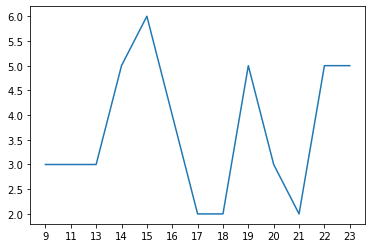

In [99]:
import matplotlib.pyplot as plt
plt.plot(df24['time'],df24['count'])


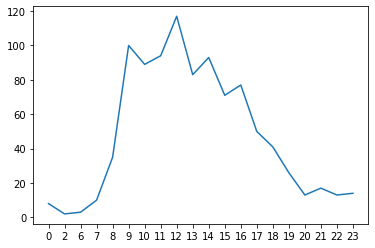

In [100]:
import matplotlib.pyplot as plt
plt.plot(df25['time'],df25['count'])
